#Handling Categorical Features
(Under feature Transformation. )



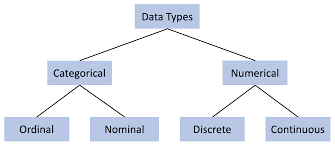

**Nominal Data** - The data does not have any relationship amongst themselves. There is not particular order in this type of data. eg. states of a country.


**Ordinal Data** - The data has a order or has a relationship. Eg. exam Grades (A+ , A , B+ , B..)

**Problem with Categorical Data** -- Mostly in the form of strings which cannot be directly interpreted by a ML model, thus it should be encoded into numbers.

There are two types of encodings:-

1. **Ordinal Encoding** --> works with ordinal data , encodes input categorical data.
2. **One Hot Encoding** --> works with nominal data.
3. **Label Encoding** --> extended version of ordinal encoding , but used only when the output column is also categorical.

#Ordinal Encoding
Used when the categories have a meaningful order or ranking.

eg. Education = HS , UG , PG , PG , UG , HS , UG

we know, PG > UG > HS or 2 > 1 > 0

Therefore after encoding the column would look like 0,1,2,2,1,0,1

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [101]:
files.upload()

Saving customer.csv to customer (2).csv


{'customer (2).csv': b'age,gender,review,education,purchased\r\n30,Female,Average,School,No\r\n68,Female,Poor,UG,No\r\n70,Female,Good,PG,No\r\n72,Female,Good,PG,No\r\n16,Female,Average,UG,No\r\n31,Female,Average,School,Yes\r\n18,Male,Good,School,No\r\n60,Female,Poor,School,Yes\r\n65,Female,Average,UG,No\r\n74,Male,Good,UG,Yes\r\n98,Female,Good,UG,Yes\r\n74,Male,Good,UG,Yes\r\n51,Male,Poor,School,No\r\n57,Female,Average,School,No\r\n15,Male,Poor,PG,Yes\r\n75,Male,Poor,UG,No\r\n59,Male,Poor,UG,Yes\r\n22,Female,Poor,UG,Yes\r\n19,Male,Good,School,No\r\n97,Male,Poor,PG,Yes\r\n57,Female,Average,School,Yes\r\n32,Male,Average,PG,No\r\n18,Female,Poor,PG,Yes\r\n96,Female,Good,School,No\r\n16,Female,Average,PG,Yes\r\n57,Female,Good,School,No\r\n53,Female,Poor,PG,No\r\n69,Female,Poor,PG,No\r\n48,Male,Poor,School,No\r\n83,Female,Average,UG,Yes\r\n73,Male,Average,UG,No\r\n22,Female,Poor,School,Yes\r\n92,Male,Average,UG,Yes\r\n89,Female,Good,PG,Yes\r\n86,Male,Average,School,No\r\n74,Male,Poor,School,

In [102]:
df = pd.read_csv('customer.csv')
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [103]:
x = df.iloc[: , 2:4]
y = df.iloc[:,-1]

In [104]:
x.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [105]:
y.sample(5)

,purchased
39,No
33,Yes
32,Yes
44,No
36,Yes


In [106]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

In [107]:
display(x.shape , y.shape)
display(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(50, 2)

(50,)

(40, 2)

(10, 2)

(40,)

(10,)

In [108]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Poor' , 'Average' , 'Good'],['School' , 'UG' , 'PG']])

oe.fit(x_train)

x_train_encoded = oe.transform(x_train)
x_test_encoded = oe.transform(x_test)


In [109]:
display(x_train , x_train_encoded)

,review,education
24,Average,PG
48,Good,UG
17,Poor,UG
12,Poor,School
27,Poor,PG
33,Good,PG
16,Poor,UG
2,Good,PG
25,Good,School
14,Poor,PG


array([[1., 2.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [0., 2.],
       [2., 2.],
       [0., 1.],
       [2., 2.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [2., 2.],
       [0., 2.],
       [1., 2.],
       [2., 1.],
       [1., 1.],
       [2., 0.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [2., 0.],
       [1., 2.],
       [2., 2.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [2., 1.],
       [2., 1.],
       [2., 0.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [0., 2.],
       [0., 1.],
       [2., 0.]])

In [110]:
oe.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

#Label Encoding

use only when you want to encode Target/output columns.
Here, we cannot decide the order, it is automatically done by scikit learn.

In [111]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)


In [112]:
display(y_train , y_train_encoded)

,purchased
24,Yes
48,Yes
17,Yes
12,No
27,No
33,Yes
16,Yes
2,No
25,No
14,Yes


array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [113]:
le.classes_

array(['No', 'Yes'], dtype=object)

#One Hot Encoding

used for Nominal Categorical data, when there is no particular order or relationship in a feature

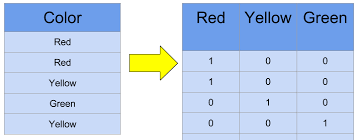

We create a column for each category irrespective of number of categories, assign 1 for the row value rest 0 for all others. All these columns are known as DUMMY COLUMNS.

Therefore, we create vectors for each category to identify them.

**Important concept in One Hot Encoding** --> Dummy Variable Trap

* It says that, We should remove the ***first column*** in One-Hot Encoding (OHE) to prevent **multicollinearity** in models like linear regression. This issue, known as the Dummy Variable Trap, happens because one of the encoded columns is completely predictable from the others, making it redundant and causing mathematical problems in regression models.

* Or in other words, the input columns might be interdependent to one another, which we don't want, especially in Linear models.

* Thus, if we have n columns after OHE, then we will remove one column and take only n-1 columns.

# What is Multicollinearity?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. This makes it difficult for the model to determine the individual effect of each variable, leading to unstable coefficients and unreliable predictions.

#Dimensionality in OHE

If there are too many categories, then after OHE too many columns or dimensions will be created. In this case, we can use the most frequent categories and group all the less frequent categories in a same column known as Others. This helps us work with lesser dimensions.

In [114]:
files.upload()

Saving cars.csv to cars (2).csv


{'cars (2).csv': b'brand,km_driven,fuel,owner,selling_price\r\nMaruti,145500,Diesel,First Owner,450000\r\nSkoda,120000,Diesel,Second Owner,370000\r\nHonda,140000,Petrol,Third Owner,158000\r\nHyundai,127000,Diesel,First Owner,225000\r\nMaruti,120000,Petrol,First Owner,130000\r\nHyundai,45000,Petrol,First Owner,440000\r\nMaruti,175000,LPG,First Owner,96000\r\nMaruti,5000,Petrol,Second Owner,45000\r\nToyota,90000,Diesel,First Owner,350000\r\nFord,169000,Diesel,First Owner,200000\r\nRenault,68000,Diesel,Second Owner,500000\r\nMaruti,100000,Petrol,Second Owner,92000\r\nMaruti,140000,Diesel,Second Owner,280000\r\nMaruti,80000,Petrol,Second Owner,200000\r\nMaruti,90000,Petrol,Second Owner,180000\r\nMahindra,40000,Petrol,First Owner,400000\r\nMaruti,70000,Diesel,Second Owner,778000\r\nHyundai,53000,Diesel,Second Owner,500000\r\nMaruti,80000,Petrol,Second Owner,150000\r\nHyundai,100000,Diesel,First Owner,680000\r\nMahindra,100000,Diesel,Second Owner,174000\r\nHonda,50000,Diesel,First Owner,9500

In [115]:
data = pd.read_csv('cars.csv')
data.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [116]:
data['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [117]:
data['brand'].nunique()

32

In [118]:
data['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [119]:
data['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


In [120]:
data.shape

(8128, 5)

Fuel has 4 cat, so it will remove fuel col and add those 4 cats  (4+4 = 8) cols, then owner has 5 categories, so it will remove owner (8-1=7) col and add those 5 cats (7+5=12)

That means we should have 12 columns after OHE

In [121]:
#one hot encoding using pandas
pd.get_dummies(data , columns=['fuel','owner'], dtype=int)    #not using brands fr.

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In [122]:
#to use dummy variable trap --> remove first cats of both features
pd.get_dummies(data,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


In [123]:
data #pandas will not make permanent changes, data remains same.

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [124]:
#in ML projects we use OHE of sklearn
x= data.iloc[:,0:4]
y= data.iloc[:,-1]
display(x,y)


,brand,km_driven,fuel,owner
0,Maruti,145500,Diesel,First Owner
1,Skoda,120000,Diesel,Second Owner
2,Honda,140000,Petrol,Third Owner
3,Hyundai,127000,Diesel,First Owner
4,Maruti,120000,Petrol,First Owner
...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner
8124,Hyundai,119000,Diesel,Fourth & Above Owner
8125,Maruti,120000,Diesel,First Owner
8126,Tata,25000,Diesel,First Owner


,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [125]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [126]:
display(x_train.shape , x_test.shape)

(6502, 4)

(1626, 4)

In [127]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()  #use drop='first' for Dummy Trap, sparse=False , np.int32
ohe.fit_transform(x_train[['fuel','owner']])  #performing fit and transform together

<6502x9 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in Compressed Sparse Row format>

It produces a sparse matrix

In [128]:
x_train_new = ohe.fit_transform(x_train[['fuel','owner']]).toarray()
x_test_new = ohe.fit_transform(x_test[['fuel','owner']]).toarray()

In [138]:
x_train_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [129]:
x_train_new.shape

(6502, 9)

we will now append Brand and km driven to complete the dataset

In [130]:
x_train_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [131]:
x_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

Both are numpy arrays

In [132]:
np.hstack((x_train[['brand','km_driven']].values,x_train_new))

array([['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 0.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [133]:
np.hstack((x_train[['brand','km_driven']].values,x_train_new)).shape

(6502, 11)

In [134]:
#OHE with very freq categories

counts = data['brand'].value_counts()
counts.shape

(32,)

In [139]:
data['brand'].nunique()
threshold = 100

rep = counts[counts <= threshold].index
#counts[counts <= threshold] filters out brands that appear less than or equal to 100 times.
#.index retrieves only the names of these brands, not their counts.

In [140]:
pd.get_dummies(data['brand'].replace(rep , 'Uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Uncommon,Volkswagen
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False
